In [1]:
import pybedtools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
data = pybedtools.BedTool("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Promotor_with_TFBS/All_GTEx_Prom_with_TFBS.bed")

# Visu von einzelnen TFBS um Überblick zu geben
- Häufigkeit TFBS unique im gesamten Datensatz
- Häufigkeit der Vorkommen jedes TFBS pro Promotor

In [5]:
from get_TFBS_pair import get_tfbs_subset, get_information_for_singel_tfbs_set

tfbs = get_tfbs_subset(data, ["sadasd"]).saveas()

In [86]:
for i in tfbs:
    print("i")

In [6]:
def get_orientation_for_single_tfbs_in_pct(tfbs_name, tfbs_arr, tfbs_orientation):
    """
    Calculates the percentage of nT Orientation for a specific tfbs.
    """
    # get List of orientation of tfbs
    tfbs_orientation_per_prom = []
    for idx, orientation in enumerate(tfbs_orientation): 
        if tfbs_arr[idx] == tfbs_name:
            tfbs_orientation_per_prom.append(orientation)
    # Calculate percentage of nT in Orientation List. 
    pct_nT = np.sum(np.array(tfbs_orientation_per_prom)=="nT")/len(np.array(tfbs_orientation_per_prom))

    return pct_nT

In [7]:
def get_count_of_single_tfbs(data, tfbs):
    """
    Function that calculates how often a certain tfbs appears in all regions, as well as the number and orientation of the tfbs per region.
    If the tfbs does not occur in the data, it will return 0 to all output variables.
    """
    tfbs_BedTool = get_tfbs_subset(data, [tfbs]).saveas()

    count_tfbs = np.array([])
    nT_percent = np.array([])

    if len(tfbs_BedTool)>0:
        for BedTool_Interval in tfbs_BedTool:
            chr, geneID, tfbs_arr, tfbs_close_tss_arr, tfbs_dist_tss_arr, tfbs_orientation, tfbs_count, tfbs_unique_count = get_information_for_singel_tfbs_set(BedTool_Interval)
            # get array for tfbs count per region. tfbs_arr == tfbs gives array with True or False. By using np.sum, True=1 and False=0, so it will return the count of True.
            count_tfbs_per_prom = np.sum(tfbs_arr == tfbs)
            count_tfbs = np.append(count_tfbs, count_tfbs_per_prom)
            # get percentage of nT Orienation per region
            nT_pct = get_orientation_for_single_tfbs_in_pct(tfbs, tfbs_arr, tfbs_orientation)
            nT_percent = np.append(nT_percent, nT_pct)
        
        count_prom = len(count_tfbs)
    else:
        print(f"{tfbs} does not appear in any region.\n")
        count_tfbs = np.array([0])
        nT_percent = np.array([0])
        count_prom = 0

    return count_prom, count_tfbs, nT_percent

In [93]:
tfbs_name = "sdsds"
count_prom, count_tfbs, nT_percent = get_count_of_single_tfbs(data, tfbs_name)

sdsds does not appear in any region.



In [94]:
nT_percent


array([0])

## Bar Plot for Single TFBS for Frequency and Orientation.

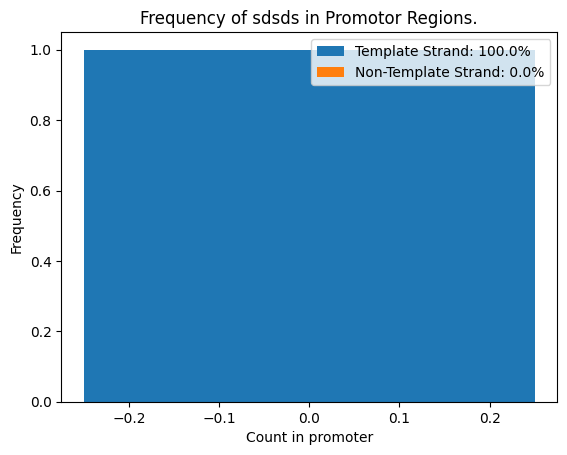

In [124]:
def plot_bar_Frequency_for_TFBS(count_tfbs, nT_percent, tfbs_name, output_folder_path):
    freq, count = np.unique(count_tfbs, return_counts=True)

    # Calculate Percentage of Orientation per Bar
    nT_pct_in_bar = []
    for i in freq:
        nT_freq = nT_percent[count_tfbs==i]
        nT_in_freq = np.sum(nT_freq)/len(nT_freq)
        nT_pct_in_bar.append(nT_in_freq)

    # Caclulate Percentage of Orientation over all Bars
    nT_percent_all = np.sum(nT_percent)/len(nT_percent)
    T_percent_all = np.abs(1-nT_percent_all)

    fig = plt.figure()
    plt.bar(freq, count, label=f"Template Strand: {round(T_percent_all*100, 2)}%", width=0.5)
    plt.bar(freq, nT_pct_in_bar*count, label=f"Non-Template Strand: {round(nT_percent_all*100, 2)}%", width=0.5)
    plt.xlabel("Count in promoter")
    plt.ylabel("Frequency")
    plt.legend()
    plt.title(f"Frequency of {tfbs_name} in Promotor Regions.")
    fig.savefig(f"{output_folder_path}/Barplot_{tfbs_name}_Frequency.png")
    #fig.show()

    

output_folder = "/sybig/home/jme/Bachelorarbeit/Da_Visualisation_TFBS_combinations"
plot_bar_Frequency_for_TFBS(count_tfbs, nT_percent, tfbs_name, output_folder)

## Plot information about all TFBS.
- Iterate over all TFBS and extract count_prom, count_tfbs, nT_percent
    - Plot for every TFBS, the plot_bar_Frequency_for_TFBS
    - Save the count_prom and nt_pct_all to plot all TFBS together in a Bar plot.
    - Save/expand the count_tfbs to plot a pie with overall occurences of multiple TFBS per side.


In [8]:
def get_count_of_all_tfbs(data, tfbs_lst, return_single_plots = False, output_folder=""):
    
    count_all = []
    nT_pct_all = []
    count_freq_all = np.array([])
    for tfbs_name in tfbs_lst:
        # Get count for single tfbs
        count_prom, count_tfbs, nT_percent = get_count_of_single_tfbs(data, tfbs_name)
        # Calculate nt_percent in total for tfbs
        nT_percent_total =  np.sum(nT_percent)/len(nT_percent)
        # Save values for single tfbs in list
        count_all.append(count_prom)
        nT_pct_all.append(nT_percent_total)
        # Save all values of count_tfbs in numpy array
        count_freq_all = np.append(count_freq_all, count_tfbs)
    
        # Plot for every TFBS a Bar chart with additional informations
        if return_single_plots:
            if len(output_folder)>0:
                plot_bar_Frequency_for_TFBS(count_tfbs, nT_percent, tfbs_name, output_folder)
            else:
                raise ValueError("Specify the path to the output folder for the plots.")
    
    return count_all, nT_pct_all, count_freq_all

### Calculating:

In [9]:
from get_TFBS_pair import get_tfbs_subset, get_information_for_singel_tfbs_set

data = pybedtools.BedTool("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Promotor_with_TFBS/All_GTEx_Prom_with_TFBS.bed")
tfbs_lst = ['AR', 'ARNT', 'ARNTL', 'ASCL1', 'ATF2', 'ATF3', 'ATF4', 'ATF7', 'BACH1', 'BACH2', 'BATF', 'BATF3', 'BCL6', 'BCL6B', 'BHLHE22', 'BHLHE40', 'CDX2', 'CEBPA', 'CEBPB', 'CEBPD', 'CEBPG', 'CLOCK', 'CREB1', 'CREM', 'CTCF', 'CTCFL', 'CUX1', 'DUX4', 'E2F1', 'E2F4', 'E2F6', 'E2F7', 'E2F8', 'EBF1', 'EBF3', 'EGR1', 'EGR2', 'EGR3', 'EHF', 'ELF1', 'ELF3', 'ELF4', 'ELF5', 'ELK1', 'ELK4', 'EOMES', 'ERF', 'ERG', 'ESR1', 'ESR2', 'ESRRA', 'ETS1', 'ETV1', 'ETV4', 'ETV5', 'ETV6', 'FLI1', 'FOS', 'FOSL1', 'FOSL2', 'FOXA1', 'FOXA2', 'FOXA3', 'FOXJ2', 'FOXK1', 'FOXK2', 'FOXO1', 'FOXP1', 'GABPA', 'GATA1', 'GATA2', 'GATA3', 'GATA4', 'GATA6', 'GFI1', 'GFI1B', 'GLIS1', 'GLIS2', 'GLIS3', 'GRHL2', 'HAND2', 'HIC1', 'HIF1A', 'HINFP', 'HLF', 'HMBOX1', 'HNF1A', 'HNF1B', 'HNF4A', 'HNF4G', 'HOXA9', 'HOXB13', 'HSF1', 'HSF2', 'IRF1', 'IRF2', 'IRF3', 'IRF4', 'ISL1', 'JUN', 'JUNB', 'JUND', 'KLF1', 'KLF11', 'KLF12', 'KLF15', 'KLF16', 'KLF4', 'KLF5', 'KLF9', 'LEF1', 'LHX2', 'LHX9', 'MAF', 'MAFB', 'MAFF', 'MAFK', 'MAX', 'MECOM', 'MEF2A', 'MEF2B', 'MEF2C', 'MEF2D', 'MEIS1', 'MEIS2', 'MGA', 'MITF', 'MLX', 'MNT', 'MXI1', 'MYB', 'MYBL2', 'MYC', 'MYCN', 'MYF5', 'MYOD1', 'MYOG', 'NEUROD1', 'NEUROG2', 'NFE2', 'NFE2L2', 'NFIA', 'NFIB', 'NFIC', 'NFIL3', 'NFKB1', 'NFKB2', 'NFYA', 'NFYB', 'NFYC', 'NKX2-5', 'NKX3-1', 'NR1H2', 'NR1H3', 'NR1H4', 'NR2C1', 'NR2C2', 'NR2F1', 'NR2F2', 'NR2F6', 'NR3C1', 'NR4A1', 'NR5A1', 'NR5A2', 'NRF1', 'OCT4', 'ONECUT1', 'ONECUT2', 'OSR2', 'OTX2', 'PAX5', 'PAX6', 'PBX1', 'PBX2', 'PBX3', 'PDX1', 'PHOX2B', 'PKNOX1', 'PLAG1', 'POU2F1', 'POU2F2', 'POU5F1', 'PPARG', 'PRDM1', 'PRDM4', 'RARA', 'RARG', 'RBPJ', 'REL', 'RELA', 'RELB', 'REST', 'RFX1', 'RFX2', 'RFX3', 'RFX5', 'RUNX1', 'RUNX2', 'RUNX3', 'RXRA', 'RXRB', 'SCRT1', 'SCRT2', 'SIX1', 'SIX2', 'SMAD2', 'SMAD3', 'SMAD4', 'SNAI2', 'SOX10', 'SOX13', 'SOX17', 'SOX2', 'SOX4', 'SOX6', 'SOX9', 'SP1', 'SP2', 'SP3', 'SP4', 'SPDEF', 'SPI1', 'SPIB', 'SREBF1', 'SRF', 'STAT1', 'STAT2', 'STAT3', 'STAT4', 'STAT5A', 'STAT5B', 'STAT6', 'T', 'TAL1', 'TBX21', 'TBX5', 'TCF12', 'TCF3', 'TCF4', 'TCF7', 'TCF7L1', 'TCF7L2', 'TEAD1', 'TEAD3', 'TEAD4', 'TFAP2A', 'TFAP2C', 'TFAP4', 'TFDP1', 'TFE3', 'TFEB', 'THAP11', 'THRB', 'TP53', 'TP63', 'TP73', 'TWIST1', 'USF1', 'USF2', 'VDR', 'WT1', 'XBP1', 'YY1', 'YY2', 'ZFX', 'ZNF143', 'ZNF263', 'ZNF740']
#tfbs_lst = ["SMAD3", "ATF2"]
output_folder = "/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Visualisation of TFBS/Single_TFBS/Barplots_Frequency_and_Orientation"

In [11]:

count_all, nT_pct_all, count_freq_all = get_count_of_all_tfbs(data, tfbs_lst)

In [12]:
def plot_count_for_TFBSs(tfbs_lst, count_all, nT_pct_all, output_folder):

    df = pd.DataFrame({"TF": tfbs_lst, "TFBS_count":count_all, "nT_ratio":nT_pct_all})
    df = df.sort_values(by="TFBS_count", ascending=False)

    x = df["TF"].to_numpy()
    y1_T = df["TFBS_count"].to_numpy()
    y2_nT = df["nT_ratio"].to_numpy() * y1_T

    nT_percent_all = np.sum(nT_pct_all)/len(nT_pct_all)
    T_percent_all = np.abs(1-nT_percent_all)
    

    fig, ax = plt.subplots(figsize=(10,45))

    ax.barh(x, y1_T, label=f"Template Strand: {round(T_percent_all*100, 2)}%", align='center')
    ax.barh(x, y2_nT, label=f"Non-Template Strand: {round(nT_percent_all*100, 2)}%", align='center')
    ax.invert_yaxis()
    ax.set_yticks(np.arange(len(x)), x)
    ax.set_xlabel("TFBSs")
    ax.set_ylabel("Frequency")
    ax.legend(loc="lower right")
    ax.grid()
    plt.title("Frequency of all TFBS in Promotor Regions")
    

    fig.savefig(f"{output_folder}/Barplot_all_TFBS.png")


In [ ]:
#plot_count_for_TFBSs(tfbs_lst, count_all, nT_pct_all, output_folder)

count_genetype = df_prom["geneType"].value_counts()
count_genetype.name = "GENCODE gene biotype"

relevant = count_genetype[:9]
other = count_genetype[10:].sum()
relevant["Other"] = other

fig = plt.figure()
relevant.plot.pie(figsize=(6,6), subplots=True, explode=[0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], shadow = True, startangle= 90, autopct='%1.1f%%',  pctdistance=0.8, labeldistance=1.1)
plt.ylabel("")
fig.savefig("GTEx_genetype_count_pie_02.png")
fig.show()

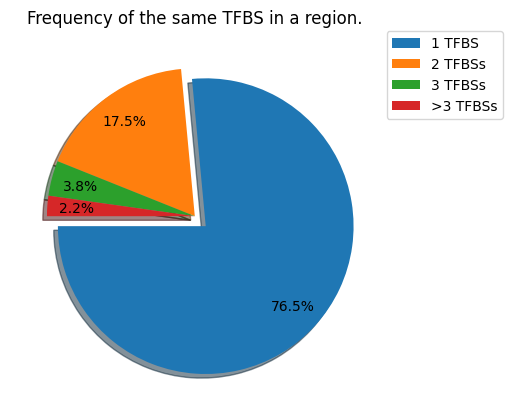

In [27]:
def plot_pie_for_count_freq(count_freq_all, output_folder):
    freq, count = np.unique(count_freq_all, return_counts=True)
    series = pd.Series(index=freq, data=count)

    relevant = series[:3]
    other = series[4:].sum()
    relevant[">3"] = other


    fig = plt.figure()
    relevant.plot(kind="pie", figsize=(6,6), subplots=True, explode=[0.1, 0., 0., 0.], shadow = True, startangle=180, autopct='%1.1f%%',  pctdistance=0.8, labeldistance=None, legend=True)
    plt.title("Frequency of the same TFBS in a region.")
    plt.legend(["1 TFBS", "2 TFBSs", "3 TFBSs", ">3 TFBSs"],bbox_to_anchor=(1, 1.02), loc='upper left')
    #plt.legend()
    #plt.xticks(np.arange(2), ["homotypic", "hetortypic"])
    fig.savefig(f"{output_folder}/Pie_TFBS_count_per_Promotor.png")

plot_pie_for_count_freq(count_freq_all, output_folder)

In [100]:
len(count_all), len(nT_pct_all), len(count_freq_all) 

count_freq_per_tfbs =  []
idx_base = 0
for idx in range(len(count_all)):
    idx_add = count_all[idx]
    count_per_prom = list(count_freq_all[idx_base:idx_base + idx_add])
    count_freq_per_tfbs.append(count_per_prom)
    idx_base =+ idx_add

In [102]:
add = count_all[0]
len(count_freq_all[add: add + count_all[1]])

4728

In [103]:
count_all

[10367,
 4728,
 123,
 2058,
 1248,
 4327,
 613,
 2024,
 1820,
 509,
 890,
 121,
 1345,
 20,
 463,
 5141,
 1303,
 4219,
 4265,
 406,
 1631,
 43,
 8410,
 5063,
 13017,
 5127,
 286,
 456,
 10496,
 2642,
 8199,
 99,
 115,
 3546,
 1893,
 7278,
 4608,
 4237,
 2738,
 6766,
 4232,
 2008,
 39,
 2477,
 2324,
 701,
 1650,
 8484,
 13720,
 1243,
 341,
 6142,
 4334,
 2929,
 3727,
 1837,
 6919,
 3755,
 969,
 1429,
 6879,
 4854,
 967,
 62,
 406,
 1651,
 3109,
 1853,
 8102,
 2570,
 2679,
 3826,
 2364,
 1559,
 122,
 159,
 3853,
 1339,
 1617,
 3205,
 1342,
 41,
 5934,
 19,
 574,
 693,
 332,
 344,
 4040,
 1487,
 121,
 1685,
 1144,
 13,
 682,
 2094,
 2130,
 3671,
 129,
 9320,
 1609,
 5796,
 4046,
 5740,
 2984,
 4320,
 1207,
 4998,
 8761,
 7539,
 224,
 70,
 363,
 505,
 873,
 2109,
 1988,
 10918,
 993,
 814,
 1044,
 187,
 104,
 356,
 1302,
 281,
 3153,
 2832,
 3635,
 6337,
 4940,
 494,
 13049,
 9169,
 734,
 2076,
 178,
 3103,
 1275,
 2071,
 5101,
 678,
 277,
 2133,
 1671,
 3494,
 3636,
 2090,
 2674,
 2285,
 

In [120]:
df = pd.DataFrame({"tfbs_lst":tfbs_lst, "count_all":count_all, "nT_pct_all":nT_pct_all, "count_freq_per_tfbs":count_freq_per_tfbs})
df.to_csv("count.csv", index=False)

In [121]:
# Use ast.literal_eval(x) to convert string-list in df back to an python list
import ast 


df_test = pd.read_csv("count.csv", index_col =None)
[len(x) for x in df_test["count_freq_per_tfbs"]]
df_test, [len(ast.literal_eval(x)) for x in df_test["count_freq_per_tfbs"]]

(    tfbs_lst  count_all  nT_pct_all  \
 0         AR      10367    0.498818   
 1       ARNT       4728    0.489834   
 2      ARNTL        123    0.516260   
 3      ASCL1       2058    0.510569   
 4       ATF2       1248    0.507879   
 ..       ...        ...         ...   
 263      YY2        830    0.451205   
 264      ZFX       1146    0.478185   
 265   ZNF143       4459    0.539994   
 266   ZNF263       2881    0.492884   
 267   ZNF740        397    0.521411   
 
                                    count_freq_per_tfbs  
 0    [1.0, 2.0, 1.0, 2.0, 4.0, 1.0, 2.0, 1.0, 2.0, ...  
 1    [1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, ...  
 2    [1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, ...  
 3    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...  
 4    [1.0, 1.0, 6.0, 2.0, 2.0, 1.0, 2.0, 2.0, 4.0, ...  
 ..                                                 ...  
 263  [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 4.0, 1.0, ...  
 264  [2.0, 2.0, 3.0, 2.0, 1.0, 2.0, 1.0, 1.0, 3.0, ..

# Pairwise Intersection with *InterveneTool*

Data Processing:
- CSV file
    - Each TFBS as columns
    - Promotor/GeneID in Row

In [125]:
from get_TFBS_pair import get_tfbs_subset

tfbs_lst = ['AR', 'ARNT', 'ARNTL', 'ASCL1', 'ATF2', 'ATF3', 'ATF4', 'ATF7', 'BACH1', 'BACH2', 'BATF', 'BATF3', 'BCL6', 'BCL6B', 'BHLHE22', 'BHLHE40', 'CDX2', 'CEBPA', 'CEBPB', 'CEBPD', 'CEBPG', 'CLOCK', 'CREB1', 'CREM', 'CTCF', 'CTCFL', 'CUX1', 'DUX4', 'E2F1', 'E2F4', 'E2F6', 'E2F7', 'E2F8', 'EBF1', 'EBF3', 'EGR1', 'EGR2', 'EGR3', 'EHF', 'ELF1', 'ELF3', 'ELF4', 'ELF5', 'ELK1', 'ELK4', 'EOMES', 'ERF', 'ERG', 'ESR1', 'ESR2', 'ESRRA', 'ETS1', 'ETV1', 'ETV4', 'ETV5', 'ETV6', 'FLI1', 'FOS', 'FOSL1', 'FOSL2', 'FOXA1', 'FOXA2', 'FOXA3', 'FOXJ2', 'FOXK1', 'FOXK2', 'FOXO1', 'FOXP1', 'GABPA', 'GATA1', 'GATA2', 'GATA3', 'GATA4', 'GATA6', 'GFI1', 'GFI1B', 'GLIS1', 'GLIS2', 'GLIS3', 'GRHL2', 'HAND2', 'HIC1', 'HIF1A', 'HINFP', 'HLF', 'HMBOX1', 'HNF1A', 'HNF1B', 'HNF4A', 'HNF4G', 'HOXA9', 'HOXB13', 'HSF1', 'HSF2', 'IRF1', 'IRF2', 'IRF3', 'IRF4', 'ISL1', 'JUN', 'JUNB', 'JUND', 'KLF1', 'KLF11', 'KLF12', 'KLF15', 'KLF16', 'KLF4', 'KLF5', 'KLF9', 'LEF1', 'LHX2', 'LHX9', 'MAF', 'MAFB', 'MAFF', 'MAFK', 'MAX', 'MECOM', 'MEF2A', 'MEF2B', 'MEF2C', 'MEF2D', 'MEIS1', 'MEIS2', 'MGA', 'MITF', 'MLX', 'MNT', 'MXI1', 'MYB', 'MYBL2', 'MYC', 'MYCN', 'MYF5', 'MYOD1', 'MYOG', 'NEUROD1', 'NEUROG2', 'NFE2', 'NFE2L2', 'NFIA', 'NFIB', 'NFIC', 'NFIL3', 'NFKB1', 'NFKB2', 'NFYA', 'NFYB', 'NFYC', 'NKX2-5', 'NKX3-1', 'NR1H2', 'NR1H3', 'NR1H4', 'NR2C1', 'NR2C2', 'NR2F1', 'NR2F2', 'NR2F6', 'NR3C1', 'NR4A1', 'NR5A1', 'NR5A2', 'NRF1', 'OCT4', 'ONECUT1', 'ONECUT2', 'OSR2', 'OTX2', 'PAX5', 'PAX6', 'PBX1', 'PBX2', 'PBX3', 'PDX1', 'PHOX2B', 'PKNOX1', 'PLAG1', 'POU2F1', 'POU2F2', 'POU5F1', 'PPARG', 'PRDM1', 'PRDM4', 'RARA', 'RARG', 'RBPJ', 'REL', 'RELA', 'RELB', 'REST', 'RFX1', 'RFX2', 'RFX3', 'RFX5', 'RUNX1', 'RUNX2', 'RUNX3', 'RXRA', 'RXRB', 'SCRT1', 'SCRT2', 'SIX1', 'SIX2', 'SMAD2', 'SMAD3', 'SMAD4', 'SNAI2', 'SOX10', 'SOX13', 'SOX17', 'SOX2', 'SOX4', 'SOX6', 'SOX9', 'SP1', 'SP2', 'SP3', 'SP4', 'SPDEF', 'SPI1', 'SPIB', 'SREBF1', 'SRF', 'STAT1', 'STAT2', 'STAT3', 'STAT4', 'STAT5A', 'STAT5B', 'STAT6', 'T', 'TAL1', 'TBX21', 'TBX5', 'TCF12', 'TCF3', 'TCF4', 'TCF7', 'TCF7L1', 'TCF7L2', 'TEAD1', 'TEAD3', 'TEAD4', 'TFAP2A', 'TFAP2C', 'TFAP4', 'TFDP1', 'TFE3', 'TFEB', 'THAP11', 'THRB', 'TP53', 'TP63', 'TP73', 'TWIST1', 'USF1', 'USF2', 'VDR', 'WT1', 'XBP1', 'YY1', 'YY2', 'ZFX', 'ZNF143', 'ZNF263', 'ZNF740']

In [156]:
# Function to get a List with all GeneIDs for a given TFBS in a BedTool.
def get_GeneIDs_for_TFBS(BedTool,tfbs_name):
    tfbs_BedTool = get_tfbs_subset(BedTool, tfbs_name)
    GeneIDs = [Interval.name for Interval in tfbs_BedTool]
    return GeneIDs

In [166]:
# Function to get a dataframe with each TFBS as columns, containing Promotor/GeneIDs as rows.
def get_csv_for_pairwise_inersection_tfbs_in_prom(BedTool, tfbs_lst, output_csv=""):
    """
    Function that processes the BedTool file and returns for each TFBS in tfbs_lst, their Promotor/GeneIDs. 
    This will be saved as .csv file, which can be used as input for the InterveneTool to get the pairwise intersection of tfbs per region.
    """
    df = pd.DataFrame([])
    for tfbs_name in tfbs_lst:
        GeneIDs_lst = get_GeneIDs_for_TFBS(BedTool,tfbs_name)
        GeneIDs_series = pd.Series(GeneIDs_lst)
        df = pd.concat([df,GeneIDs_series], axis=1, ignore_index=True)
    df.columns = tfbs_lst
    if len(output_csv) > 0:
        df.to_csv(f"{output_csv}/List_for_pairwise_intersection.csv", index=False)
    return df


In [167]:
#get_csv_for_pairwise_inersection_tfbs_in_prom(data, tfbs_lst, output_csv="/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Visualisation of TFBS/Single_TFBS/Pairwise_Intersection_TFBS")

,AR,ARNT,ARNTL,ASCL1,ATF2,ATF3,ATF4,ATF7,BACH1,BACH2,...,USF2,VDR,WT1,XBP1,YY1,YY2,ZFX,ZNF143,ZNF263,ZNF740
0,ENSG00000223181.1,ENSG00000225880.5,ENSG00000160049.11,ENSG00000223823.1,ENSG00000237491.8,ENSG00000237491.8,ENSG00000235263.1,ENSG00000237491.8,ENSG00000187634.11,ENSG00000248333.8,...,ENSG00000237491.8,ENSG00000187583.10,ENSG00000272438.1,ENSG00000177757.2,ENSG00000237491.8,ENSG00000237491.8,ENSG00000160087.20,ENSG00000237491.8,ENSG00000283040.1,ENSG00000169972.11
1,ENSG00000228327.3,ENSG00000272438.1,ENSG00000237301.1,ENSG00000162571.13,ENSG00000228327.3,ENSG00000228327.3,ENSG00000127481.14,ENSG00000228327.3,ENSG00000224870.6,ENSG00000272004.1,...,ENSG00000228327.3,ENSG00000187608.8,ENSG00000230699.2,ENSG00000078808.16,ENSG00000272438.1,ENSG00000236269.1,ENSG00000127054.20,ENSG00000228327.3,ENSG00000272438.1,ENSG00000236423.5
2,ENSG00000177757.2,ENSG00000187634.11,ENSG00000184677.16,ENSG00000230415.1,ENSG00000205231.1,ENSG00000230699.2,ENSG00000230424.1,ENSG00000224969.1,ENSG00000221978.11,ENSG00000232912.5,...,ENSG00000234711.1,ENSG00000224969.1,ENSG00000272512.1,ENSG00000176022.4,ENSG00000230699.2,ENSG00000048707.13,ENSG00000215014.4,ENSG00000187961.13,ENSG00000187961.13,ENSG00000198912.10
3,ENSG00000225880.5,ENSG00000187608.8,ENSG00000283938.1,ENSG00000127054.20,ENSG00000160072.19,ENSG00000187634.11,ENSG00000007968.6,ENSG00000205231.1,ENSG00000242485.5,ENSG00000236269.1,...,ENSG00000272438.1,ENSG00000131591.17,ENSG00000188290.10,ENSG00000215014.4,ENSG00000187634.11,ENSG00000055070.16,ENSG00000234396.3,ENSG00000224870.6,ENSG00000186827.10,ENSG00000227634.2
4,ENSG00000272438.1,ENSG00000131591.17,ENSG00000158246.7,ENSG00000235098.8,ENSG00000197785.13,ENSG00000131591.17,ENSG00000252691.1,ENSG00000175756.13,ENSG00000197785.13,ENSG00000272482.1,...,ENSG00000224969.1,ENSG00000197785.13,ENSG00000189409.13,ENSG00000160075.11,ENSG00000187961.13,ENSG00000053372.4,ENSG00000198912.10,ENSG00000221978.11,ENSG00000242485.5,ENSG00000228140.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
df = pd.read_csv("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Visualisation of TFBS/Single_TFBS/Pairwise_Intersection_TFBS/List_for_pairwise_intersection.csv")


/tmp/ipykernel_3919192/2980907427.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,2

In [202]:
column_len = [sum(df[x].notna()) for x in df]
columns_greater_3000 = df.columns[np.array(column_len)>3000]
filter_df = df.filter(items=columns_greater_3000)
filter_df.to_csv("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Visualisation of TFBS/Single_TFBS/Pairwise_Intersection_TFBS/List_for_pairwise_intersection_only_len_greater_3000.csv", index=False)

'b'

# Test TFBS pairs

In [56]:
def Check_if_input_in_BedTool_column(BedTool, column_number, input):
    # Creating an array with unique entrys of BedTool column
    BedTool_column = np.unique(np.array(list(map(lambda x: x.fields[column_number], BedTool))))
    # Checking if input is in column
    if np.isin(np.array(input), BedTool_column):
        return True
    else:
        return False


def filter_bed(BedTool, column_number, filter_content):
    """
    Function that filters a bed file by a specific content in a specific column. 
    It Checks first, if filter_content is in BedTool column.
    Bsp. for project-Data
    Filter for GeneType: filter_bed(BedTool, 10, "protein_coding")
    Filter for Chromosome: filter_bed(BedTool, 0, "chr22")
    """

    if Check_if_input_in_BedTool_column(BedTool, column_number, filter_content):
        filtered_BedTool = BedTool.filter(lambda x: x.fields[column_number] == filter_content)
    else:
        print(f"\nWARNING: '{filter_content}' could not be found in column {column_number} of given BedTool. Therefore the BedTool object could not be filtered!\n")
        print("The Original BedTool was returned.")
        filtered_BedTool = BedTool
    
    return filtered_BedTool

In [66]:
def get_tfbs_information_for_BedTool_Interval(BedTool_Interval):
    """
    Function that is splitting the infomration about the TFBS, such as TSS-distance and strand oriantation and saving it in diffrent numpy arrays.
    These numpy arrays can be used in other functions to create a DataFrame for the whole BedTool Object. 
    """
    # Splitting infomration into numpy arrays
    tfbs_arr = np.array(BedTool_Interval.fields[6].split(","))
    tfbs_close_tss_arr = np.array(BedTool_Interval.fields[7].split(","), dtype="int")
    tfbs_dist_tss_arr = np.array(BedTool_Interval.fields[8].split(","), dtype="int")

    # Get information if tfbs is on same strand as gene or not (True, False)
    tfbs_strand = np.array(BedTool_Interval.fields[9].split(","))
    tfbs_strand_orientation = np.array(["nT" if i==BedTool_Interval.fields[5] else "T" for i in tfbs_strand])

    # Generate a numpy array, that contains the GeneID, necessary for additional functions. Its a array with the same length as the other, but all containting the same GeneID.
    geneID = np.array([BedTool_Interval.fields[3] for i in range(len(tfbs_arr))])
    chr = np.array([BedTool_Interval.fields[0] for i in range(len(tfbs_arr))])

    # Generate a numpy array, that contains the count of all tfbs. Its a array with the same length as the other, but all containting the same tfbs count.
    tfbs_count = np.array([len(tfbs_arr)+1 for i in range(len(tfbs_arr))])
    # Generate a numpy array, that contains the count of all unqiue tfbs.(s.o)
    tfbs_unique_count = np.array([len(np.unique(tfbs_arr))+1 for i in range(len(tfbs_arr))])

    return chr, geneID, tfbs_arr, tfbs_close_tss_arr, tfbs_dist_tss_arr, tfbs_strand_orientation, tfbs_count, tfbs_unique_count

In [61]:
data_prot = filter_bed(data, 10, "protein_coding")
prom = data_prot[0]
print(prom)

chr1	923727	923927	ENSG00000187634.11	386	+	PBX2,GLIS3,ARNT,BHLHE40,MYC,HIF1A,MYC,KLF9,RELB,PAX5,SP1,CREB1,RXRA,RXRA,TFAP2C,TFAP2A,TFAP2A,FOXA2,RUNX2,EGR1,JUN,ATF3,REST,CREB1,FOXO1,NFIC,TFAP2A,MYB,TCF7L2,YY1,CTCFL,E2F1,NRF1,E2F1,TFAP2A,TEAD4,NFE2,JUN,JUND,SMAD3,NFE2L2,JUN,ESR1,ESR1,ERG,BACH1,MAX,MYCN,MYC,E2F1,MYC,KLF5,FLI1,TFAP2C,TFAP2A,TCF12,ETS1,NEUROD1,GABPA,ETV1,MYC,CTCF,CTCF,THAP11,TFAP4,REST,SP1,RUNX1,TFAP2A	74,64,76,74,73,75,73,70,91,75,72,78,79,76,86,86,87,29,123,-2,0,2,-7,2,9,19,64,31,27,31,48,54,55,52,62,167,149,145,148,148,148,148,151,151,95,174,182,181,181,181,182,184,95,126,126,94,95,93,93,93,94,91,93,97,108,104,112,121,126	87,78,82,84,84,85,85,86,102,87,87,91,94,95,99,99,99,40,132,12,13,14,14,15,20,30,76,41,41,43,60,66,66,74,76,179,160,160,161,162,163,164,168,168,105,189,192,193,193,193,193,194,105,138,140,105,105,106,107,107,109,110,112,116,118,125,127,132,138	+,+,-,-,-,-,+,+,+,-,+,+,-,+,-,-,+,-,+,-,-,+,-,+,+,-,+,-,-,-,-,+,+,-,-,+,+,-,+,+,+,+,+,-,+,-,-,-,-,-,+,+,+,+,+,+,

In [86]:
tf, close, dist, ori = process_prom(prom)
sorted_idx = np.lexsort((close, tf))
tf_s, close_s, dist_s, ori_s = tf[sorted_idx], close[sorted_idx], dist[sorted_idx], ori[sorted_idx]

In [87]:
tf_s, close_s, dist_s, ori_s

(array(['ARNT', 'ATF3', 'BACH1', 'BHLHE40', 'CREB1', 'CREB1', 'CTCF',
        'CTCF', 'CTCFL', 'E2F1', 'E2F1', 'E2F1', 'EGR1', 'ERG', 'ESR1',
        'ESR1', 'ETS1', 'ETV1', 'FLI1', 'FOXA2', 'FOXO1', 'GABPA', 'GLIS3',
        'HIF1A', 'JUN', 'JUN', 'JUN', 'JUND', 'KLF5', 'KLF9', 'MAX', 'MYB',
        'MYC', 'MYC', 'MYC', 'MYC', 'MYC', 'MYCN', 'NEUROD1', 'NFE2',
        'NFE2L2', 'NFIC', 'NRF1', 'PAX5', 'PBX2', 'RELB', 'REST', 'REST',
        'RUNX1', 'RUNX2', 'RXRA', 'RXRA', 'SMAD3', 'SP1', 'SP1', 'TCF12',
        'TCF7L2', 'TEAD4', 'TFAP2A', 'TFAP2A', 'TFAP2A', 'TFAP2A',
        'TFAP2A', 'TFAP2A', 'TFAP2C', 'TFAP2C', 'TFAP4', 'THAP11', 'YY1'],
       dtype='<U7'),
 array([ 76,   2, 174,  74,   2,  78,  91,  93,  48,  52,  54, 181,  -2,
         95, 151, 151,  95,  93,  95,  29,   9,  93,  64,  75,   0, 145,
        148, 148, 184,  70, 182,  31,  73,  73,  94, 181, 182, 181,  93,
        149, 148,  19,  55,  75,  74,  91,  -7, 104, 121, 123,  76,  79,
        148,  72, 112,  94,  27, 

In [114]:
def calculate_pairs(tf_s, close_s, dist_s, ori_s):
    """
    Function that calculates tfbs-pairs and associated information in numpy arays of tuples. 
    """
    tf_pairs = np.array([(a, b) for idx, a in enumerate(tf_s) for b in tf_s[idx + 1:]])
    close_pairs = np.array([(a, b) for idx, a in enumerate(close_s) for b in close_s[idx + 1:]])
    dist_pairs = np.array([(a, b) for idx, a in enumerate(dist_s) for b in dist_s[idx + 1:]])
    ori_pairs = np.array([(a, b) for idx, a in enumerate(ori_s) for b in ori_s[idx + 1:]])
    return tf_pairs, close_pairs, dist_pairs, ori_pairs

In [134]:
def sort_tfbs_by_order(tf_pairs, close_pairs, dist_pairs, ori_pairs):
    sorted_idx = np.argsort(close_pairs, axis=1)
    tf_pairs_order = np.take_along_axis(tf_pairs, sorted_idx, axis=1)
    close_pairs_order = np.take_along_axis(close_pairs, sorted_idx, axis=1)
    dist_pairs_order = np.take_along_axis(dist_pairs, sorted_idx, axis=1)
    ori_pairs_order = np.take_along_axis(ori_pairs, sorted_idx, axis=1)
    return tf_pairs_order, close_pairs_order, dist_pairs_order, ori_pairs_order

In [135]:
def process_prom(BedTool_Interval):
    chr, geneID, tfbs_arr, tfbs_close_tss_arr, tfbs_dist_tss_arr, tfbs_strand_orientation, tfbs_count, tfbs_unique_count = get_tfbs_information_for_BedTool_Interval(BedTool_Interval)
    
    # Sorting tfbs arrays according to tfbs_name and then to tss distance.
    sorted_idx = np.lexsort((tfbs_close_tss_arr, tfbs_arr))
    tf_s, close_s, dist_s, ori_s = tf[sorted_idx], close[sorted_idx], dist[sorted_idx], ori[sorted_idx]
    # Calculating Pairs of these sorted arrays
    tf_pairs, close_pairs, dist_pairs, ori_pairs = calculate_pairs(tf_s, close_s, dist_s, ori_s)
    # Sorting Pairs by tfbs_order
    tf_pairs_order, close_pairs_order, dist_pairs_order, ori_pairs_order = sort_tfbs_by_order(tf_pairs, close_pairs, dist_pairs, ori_pairs)

    # Summarize arrays to csv entry

    
    return tf_pairs_order, close_pairs_order, dist_pairs_order, ori_pairs_order

In [140]:
tf_pairs_order, close_pairs_order, dist_pairs_order, ori_pairs_order = process_prom(prom)
tf_pairs_order, close_pairs_order, dist_pairs_order, ori_pairs_order


(array([['ATF3', 'ARNT'],
        ['ARNT', 'BACH1'],
        ['BHLHE40', 'ARNT'],
        ...,
        ['THAP11', 'TFAP4'],
        ['YY1', 'TFAP4'],
        ['YY1', 'THAP11']], dtype='<U7'),
 array([[  2,  76],
        [ 76, 174],
        [ 74,  76],
        ...,
        [ 97, 108],
        [ 31, 108],
        [ 31,  97]]),
 array([[ 14,  82],
        [ 82, 189],
        [ 84,  82],
        ...,
        [116, 118],
        [ 43, 118],
        [ 43, 116]]),
 array([['nT', 'T'],
        ['T', 'T'],
        ['T', 'T'],
        ...,
        ['nT', 'nT'],
        ['T', 'nT'],
        ['T', 'nT']], dtype='<U2'))

In [141]:
# chr,geneID,TFBS_close,TFBS_dist,closest_TSS_distance,furthest_TSS_distance,orientation_of_pair,distance_between_pair,tfbs_count,tfbs_count_unique
[f"{chr},{geneID},{tf_pairs_order[i,0]},{tf_pairs_order[i,1]},{dist_pairs_order[i,1]},{pair_ori},{pair_dist},{tfbs_count},{tfbs_count_unique}" for i in range(len(tf_pairs_order))]

['ATF3,ARNT',
 'ARNT,BACH1',
 'BHLHE40,ARNT',
 'CREB1,ARNT',
 'ARNT,CREB1',
 'ARNT,CTCF',
 'ARNT,CTCF',
 'CTCFL,ARNT',
 'E2F1,ARNT',
 'E2F1,ARNT']